In [26]:
import pathlib
import cv2
import numpy as np

from tqdm import tqdm

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

In [4]:
img = cv2.imread('../test_data/2019-02-20-test/042.jpg')

In [40]:
files_list = ['../test_data/2019-02-20/042.jpg', '../test_data/2019-02-20/043.jpg', '../test_data/2019-02-20/144.jpg']

In [5]:
def calculate_gradients(file_path):
    img_arr = np.zeros((921600, 0))
    for current_file in tqdm(sorted(pathlib.Path(file_path).iterdir())):
        file_string = str(current_file)
        img = cv2.imread(file_string, flags=cv2.IMREAD_GRAYSCALE)
        img_1d = np.expand_dims(np.ravel(img), axis=1)
        img_arr = np.append(img_arr, img_1d, axis=1)

    img_diff = np.diff(img_arr)
    img_norms = np.linalg.norm(img_diff, axis=0)
    
    return (img_arr, img_diff, img_norms)

In [6]:
file_path = '../test_data/2019-02-20-test/'
img_arr, img_diff, img_norms = calculate_gradients(file_path)

100%|██████████| 226/226 [02:57<00:00,  1.62s/it]


In [7]:
avg = np.mean(img_norms)
std_dev = np.std(img_norms)
transition_frames = np.argwhere(img_norms > avg)
transition_frames = transition_frames.flatten()
print("AVG: {}\nSTD: {}".format(avg, std_dev))

AVG: 3737.7649035847744
STD: 5564.531748392064


In [8]:
kshots_arr_mean = np.mean(img_norms[img_norms>avg])
img_norms[img_norms>kshots_arr_mean]
k_frames = np.argwhere(img_norms > kshots_arr_mean)
k_frames = k_frames.flatten()

In [9]:
transition_frames

array([  0,  56,  57,  60,  83, 119, 120, 182, 183, 184, 185, 186, 208,
       219, 220, 222, 224])

In [10]:
def get_files_list(file_path, transition_frames):
    files_list = list()
    first_file = sorted(pathlib.Path(file_path).iterdir())[0]
    start_int = int(first_file.stem)
    for i in tqdm(transition_frames):
        files_list.append(str(pathlib.Path(file_path)
                      .joinpath('{:03d}.jpg'.format(i+start_int))))
    return files_list

In [12]:
files_list = get_files_list(file_path, transition_frames)
print(files_list)
print(file_path)

100%|██████████| 17/17 [00:00<00:00, 22047.98it/s]

['../test_data/2019-02-20-test/036.jpg', '../test_data/2019-02-20-test/092.jpg', '../test_data/2019-02-20-test/093.jpg', '../test_data/2019-02-20-test/096.jpg', '../test_data/2019-02-20-test/119.jpg', '../test_data/2019-02-20-test/155.jpg', '../test_data/2019-02-20-test/156.jpg', '../test_data/2019-02-20-test/218.jpg', '../test_data/2019-02-20-test/219.jpg', '../test_data/2019-02-20-test/220.jpg', '../test_data/2019-02-20-test/221.jpg', '../test_data/2019-02-20-test/222.jpg', '../test_data/2019-02-20-test/244.jpg', '../test_data/2019-02-20-test/255.jpg', '../test_data/2019-02-20-test/256.jpg', '../test_data/2019-02-20-test/258.jpg', '../test_data/2019-02-20-test/260.jpg']
../test_data/2019-02-20-test/


In [74]:
def display_images(files_list):
    fig = plt.figure(1, (14., 10.))
    img_per_row = 7
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(len(files_list)//img_per_row+1, img_per_row),  # creates 2x2 grid of axes
                 axes_pad=0.05,  # pad between axes in inch.
                 )
    for i,f in tqdm(enumerate(files_list)):
        img = cv2.imread(f)
        img = img_as_float(img)
        grid[i].axis('off')
        grid[i].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)

17it [00:00, 19.23it/s]


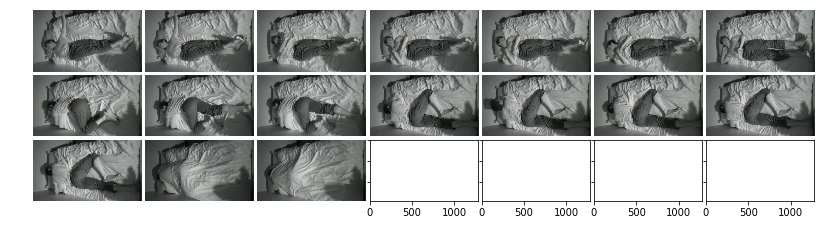

In [75]:
display_images(files_list)